Shape of X: (1797, 64)
Number of classes: 10


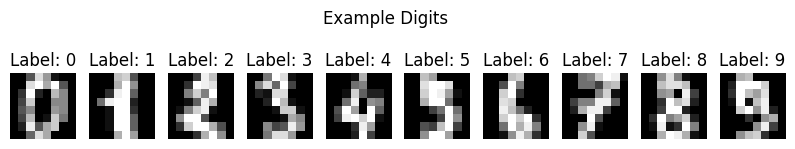

Accuracy: 0.9888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



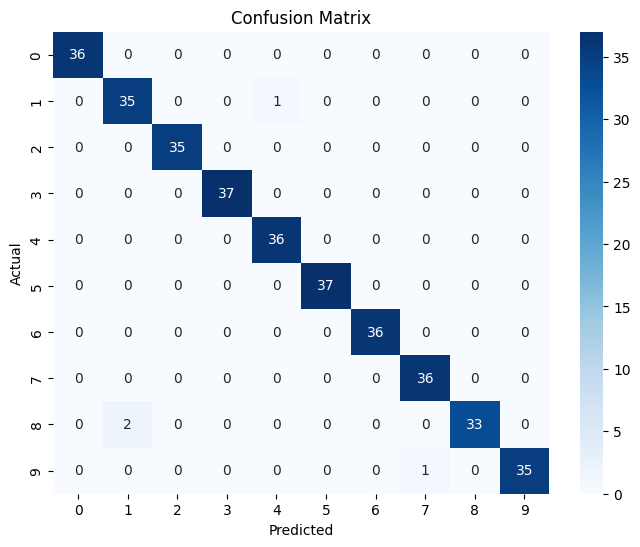

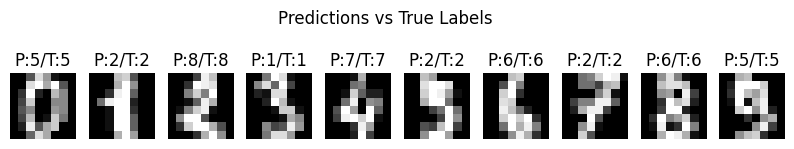

The RBF SVM classifier achieved high accuracy in recognizing handwritten digits. Further tuning of hyperparameters like C and gamma could improve performance even more.


In [1]:
# Handwritten Digit Recognition with RBF Kernel SVM

## 1. Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 2. Load Digits Dataset
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

print("Shape of X:", X.shape)
print("Number of classes:", len(np.unique(y)))

## 3. Visualize Some Digits
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Label: {digits.target[i]}")
    plt.axis("off")
plt.suptitle("Example Digits")
plt.show()

## 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Train RBF SVM
model = SVC(kernel="rbf", gamma=0.001, C=10)
model.fit(X_train_scaled, y_train)

## 7. Predictions
y_pred = model.predict(X_test_scaled)

## 8. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 9. Visualize Some Predictions
plt.figure(figsize=(10, 2))
for i, (img, pred, actual) in enumerate(zip(digits.images[:10], y_pred[:10], y_test[:10])):
    plt.subplot(1, 10, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"P:{pred}/T:{actual}")
    plt.axis("off")
plt.suptitle("Predictions vs True Labels")
plt.show()

## 10. Conclusion
print("The RBF SVM classifier achieved high accuracy in recognizing handwritten digits. Further tuning of hyperparameters like C and gamma could improve performance even more.")
